# Predicting Stock Prices Using Regression(Linear and Decision Tree)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
df = pd.read_csv("/content/upload_DJIA_table.csv")

In [13]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


In [50]:
features_df = df[['Open','High','Low','Volume']]
label_df = df[['Close']]

In [49]:
features_df

,Open,High,Low,Volume
0,17924.240234,18002.380859,17916.910156,82160000
1,17712.759766,17930.609375,17711.800781,133030000
2,17456.019531,17704.509766,17456.019531,106380000
3,17190.509766,17409.720703,17190.509766,112190000
4,17355.210938,17355.210938,17063.080078,138740000
...,...,...,...,...
1984,11532.070312,11718.280273,11450.889648,159790000
1985,11632.809570,11633.780273,11453.339844,182550000
1986,11781.700195,11782.349609,11601.519531,173590000
1987,11729.669922,11867.110352,11675.530273,183190000


In [52]:
X = features_df.iloc[:,:].values
X

array([[1.79e+04, 1.80e+04, 1.79e+04, 8.22e+07],
       [1.77e+04, 1.79e+04, 1.77e+04, 1.33e+08],
       [1.75e+04, 1.77e+04, 1.75e+04, 1.06e+08],
       ...,
       [1.18e+04, 1.18e+04, 1.16e+04, 1.74e+08],
       [1.17e+04, 1.19e+04, 1.17e+04, 1.83e+08],
       [1.14e+04, 1.18e+04, 1.14e+04, 2.13e+08]])

In [51]:
label_df

,Close
0,17949.369141
1,17929.990234
2,17694.679688
3,17409.720703
4,17140.240234
...,...
1984,11615.929688
1985,11532.959961
1986,11642.469727
1987,11782.349609


In [53]:
y = label_df.iloc[:,:].values
y

array([[17949.37],
       [17929.99],
       [17694.68],
       ...,
       [11642.47],
       [11782.35],
       [11734.32]])

In [11]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


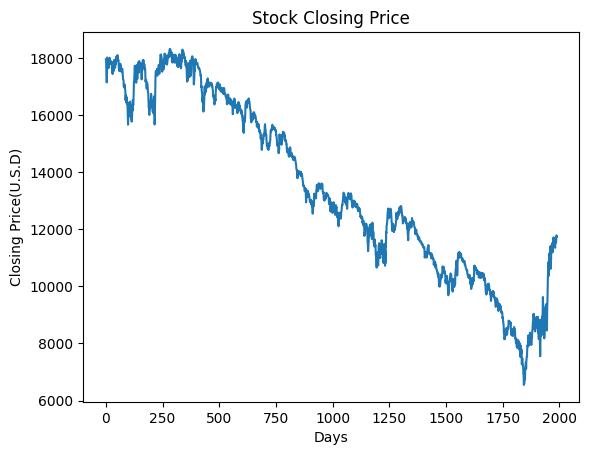

In [21]:
#visualise the close price data
plt.title("Stock Closing Price")
plt.plot(df["Close"])
plt.xlabel("Days")
plt.ylabel("Closing Price(U.S.D)")
plt.show()

In [55]:
y

array([[17949.37],
       [17929.99],
       [17694.68],
       ...,
       [11642.47],
       [11782.35],
       [11734.32]])

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [57]:
X_train

array([[1.77e+04, 1.77e+04, 1.74e+04, 1.14e+08],
       [1.04e+04, 1.06e+04, 1.04e+04, 1.84e+08],
       [1.77e+04, 1.80e+04, 1.77e+04, 1.04e+08],
       ...,
       [1.04e+04, 1.04e+04, 1.04e+04, 1.97e+08],
       [1.60e+04, 1.62e+04, 1.60e+04, 9.00e+07],
       [1.52e+04, 1.53e+04, 1.51e+04, 8.14e+07]])

In [58]:
X_test

array([[1.27e+04, 1.27e+04, 1.25e+04, 1.70e+08],
       [1.23e+04, 1.23e+04, 1.21e+04, 1.90e+08],
       [1.30e+04, 1.33e+04, 1.30e+04, 1.29e+08],
       ...,
       [1.16e+04, 1.16e+04, 1.15e+04, 7.68e+07],
       [1.21e+04, 1.21e+04, 1.20e+04, 1.26e+08],
       [1.62e+04, 1.64e+04, 1.62e+04, 7.91e+07]])

In [59]:
y_train

array([[17448.07],
       [10566.2 ],
       [17976.31],
       ...,
       [10390.11],
       [16173.24],
       [15301.26]])

In [60]:
y_test

array([[12595.75],
       [12201.59],
       [13292.  ],
       [16466.3 ],
       [11045.27],
       [15494.78],
       [ 8451.19],
       [ 7850.41],
       [10366.72],
       [17938.28],
       [ 7776.18],
       [14802.98],
       [10782.95],
       [12862.23],
       [ 8599.18],
       [12092.15],
       [11955.01],
       [16801.05],
       [15555.61],
       [17477.67],
       [ 8579.11],
       [13005.12],
       [15082.62],
       [ 9762.69],
       [16843.88],
       [15176.08],
       [13074.04],
       [13575.36],
       [12471.02],
       [15889.77],
       [12759.15],
       [16739.95],
       [12294.  ],
       [ 9286.56],
       [16991.91],
       [10510.95],
       [10888.83],
       [13170.72],
       [18144.07],
       [14824.51],
       [17706.05],
       [11559.95],
       [11855.42],
       [18005.05],
       [15275.69],
       [15126.07],
       [16947.08],
       [13264.49],
       [17758.21],
       [12217.56],
       [16458.56],
       [18010.68],
       [1725

In [61]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() #no hyper parameter tuning
regressor.fit(X_train,y_train) 

LinearRegression()

In [63]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(random_state=0)
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [64]:
y_regressor = regressor.predict(X_test)
y_decision_regressor = decision_regressor.predict(X_test)

In [65]:
y_regressor

array([[12595.  ],
       [12152.51],
       [13262.07],
       [16413.62],
       [11043.64],
       [15527.58],
       [ 8326.22],
       [ 7891.49],
       [10341.09],
       [17993.21],
       [ 7774.51],
       [14798.23],
       [10819.83],
       [12847.35],
       [ 8641.75],
       [12060.47],
       [12020.79],
       [16750.56],
       [15493.64],
       [17537.48],
       [ 8703.11],
       [12996.77],
       [15095.16],
       [ 9801.36],
       [16852.46],
       [15146.36],
       [13055.43],
       [13581.04],
       [12429.5 ],
       [15863.32],
       [12789.85],
       [16730.75],
       [12282.55],
       [ 9278.3 ],
       [16999.73],
       [10594.49],
       [10875.01],
       [13190.72],
       [18168.71],
       [14846.14],
       [17714.53],
       [11537.93],
       [11765.47],
       [18004.33],
       [15260.57],
       [15086.06],
       [16961.34],
       [13242.68],
       [17710.73],
       [12235.35],
       [16456.65],
       [18004.16],
       [1717

In [66]:
from sklearn.metrics import r2_score
r2_score(y_test, y_regressor)

0.9997310078066434

In [67]:
r2_score(y_test, y_decision_regressor)

0.9989746741834273